# Prediction vs. Date/Time (Sep 14 Exps)

In [2]:

import os
import re 
import json 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 

from scipy.interpolate import make_interp_spline

DIR = '/localhome/advit/sep19_exps/'
json_files = sorted([f for f in os.listdir(DIR) if f.endswith('.json')])


## Util Functions

In [3]:
def lat_lon_to_grid(lat, lon, grid_size=(128, 256), min_lat=-90, min_lon=-180):
    lat_step = (abs(min_lat) * 2) / grid_size[0]
    lon_step = (abs(min_lon) * 2) / grid_size[1]

    row_index = int((lat - min_lat) / lat_step)
    column_index = int((lon - min_lon) / lon_step)

    row_index = max(0, min(grid_size[0] - 1, row_index))
    column_index = max(0, min(grid_size[1] - 1, column_index))

    return row_index, column_index

In [4]:
truth_3d = []; pred_3d = []; input_3d = []

for json_file in json_files:
    json_path = os.path.join(DIR, json_file)
    
    with open(json_path, 'r') as file:
        data = json.load(file)

        for d in data: 
            input_3d.append(np.array(d['input']).squeeze())
            truth_3d.append(np.array(d['output']).squeeze())
            pred_3d.append(np.array(d['prediction']).squeeze())

input_3d = np.stack(input_3d)
truth_3d = np.stack(truth_3d)
pred_3d = np.stack(pred_3d)

In [5]:
input_3d.shape

(297, 128, 256)

In [6]:
def hours_to_datetime(hours):
    base_datetime = datetime(2017, 12, 19, 0, 0) # STARTING DATETIME 
    date_times = [base_datetime + timedelta(hours=hour) for hour in hours]

    return date_times

In [7]:
def moving_average(data, window_size):
    ma = np.convolve(data, np.ones(window_size)/window_size, mode='same')
    ma[:window_size // 2] = None  # Set beginning values to None
    ma[-(window_size // 2):] = None  # Set ending values to None
    return ma

In [8]:
def gen_plot(LOC, LAT, LONG, day_avg=15): 
    row, col = lat_lon_to_grid(LAT, LONG)

    print(f"Got row, col: {row}, {col}")

    input_loc = input_3d[:, row, col]
    pred_loc = pred_3d[:, row, col]
    truth_loc = truth_3d[:, row, col]

    delta = pred_loc - input_loc 
    delta2 = truth_loc - input_loc 
         
    hours = np.arange(1, len(truth_loc) + 1)
    hours = hours * 30   
    hours = [int(hour) for hour in hours]

    date_times = hours_to_datetime(hours)

    plt.figure(figsize=(14, 6))
    #plt.plot(date_times, np.array(pred_loc), marker='o', linestyle='--', color='r', label='Temperature ClimaX Prediction', alpha=0.2)
    #plt.plot(date_times, np.array(truth_loc), marker='s', linestyle='--', color='b', label='Temperature Truth', alpha=0.2)

    plt.plot(date_times, np.array(delta), marker='o', linestyle='--', color='r', label='Delta in ClimaX Prediction', alpha=0.2)
    plt.plot(date_times, np.array(delta2), marker='s', linestyle='--', color='b', label='Delta in Temperature Truth', alpha=0.2)


    window_size = day_avg * 2 # Since 12-hr predictions
    input_avg = moving_average(delta, window_size)
    #pred_avg = moving_average(pred_loc, window_size)
    truth_avg = moving_average(delta2, window_size)

    plt.plot(date_times, input_avg, linestyle='-', linewidth=3.0, color='r', label=f'{window_size/2}-day Moving Average (ClimaX)')
    plt.plot(date_times, truth_avg, linestyle='-',  linewidth=3.0, color='b', label=f'{window_size/2}-day Moving Average (Truth)')

    plt.xlabel('Date and Time of Prediction')
    plt.ylabel('Temperature (Kelvin)')
    plt.title(f'({LOC}) Delta in Temperature Vs. DateTime of 1-wk Pred - ClimaX, ERA5 Truth')
    plt.grid(True)
    plt.legend()
    plt.show()

## Plot Gens

Got row, col: 69, 247


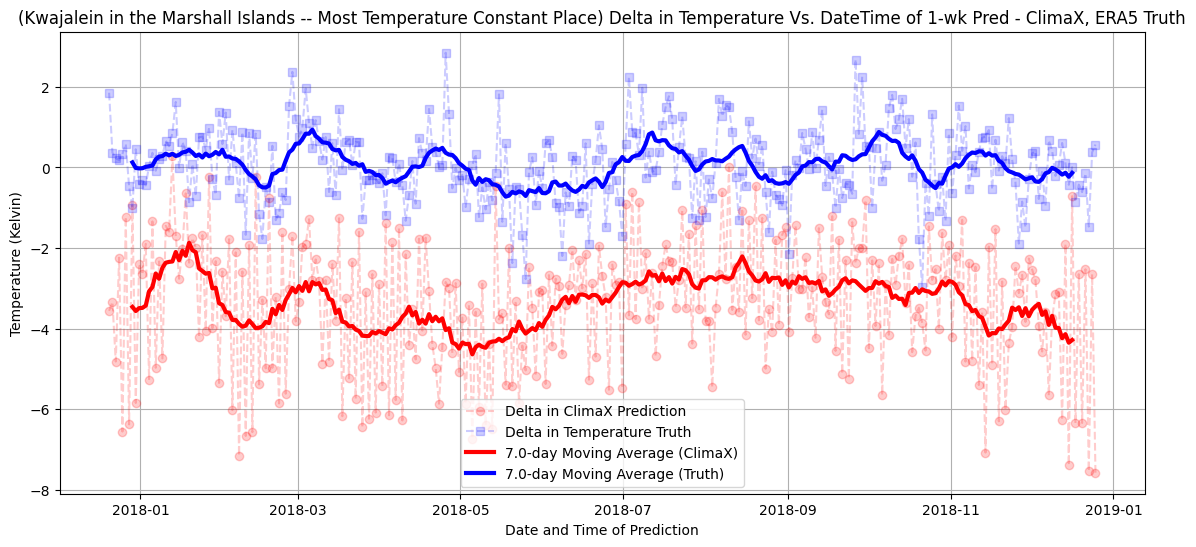

In [9]:
gen_plot("Kwajalein in the Marshall Islands -- Most Temperature Constant Place", 8.43, 167.44, day_avg=7)

Got row, col: 69, 247


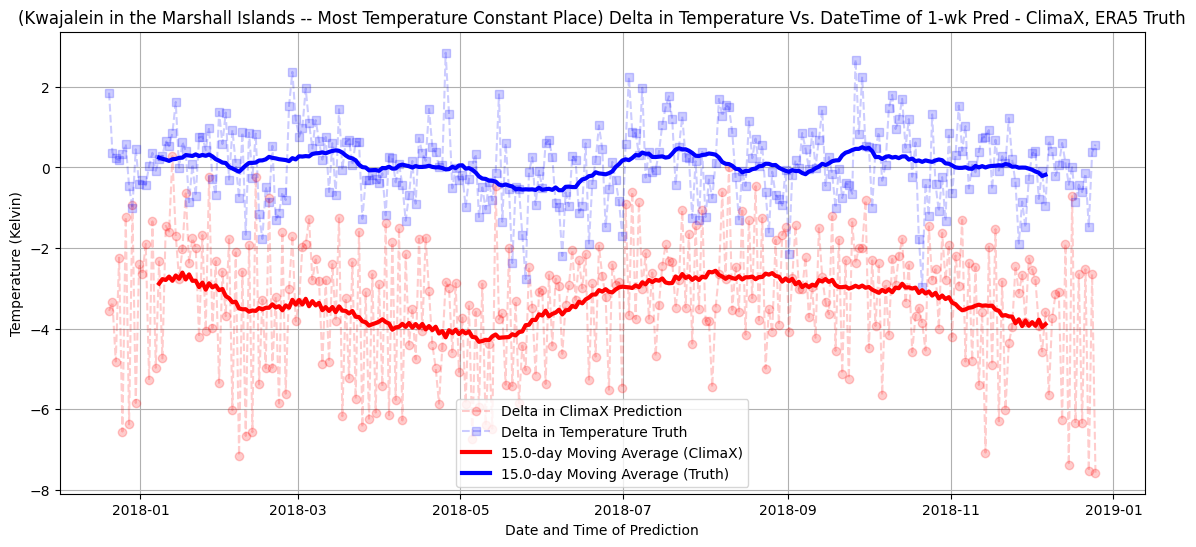

In [21]:
gen_plot("Kwajalein in the Marshall Islands -- Most Temperature Constant Place", 8.43, 167.44, day_avg=15)

Got row, col: 111, 222


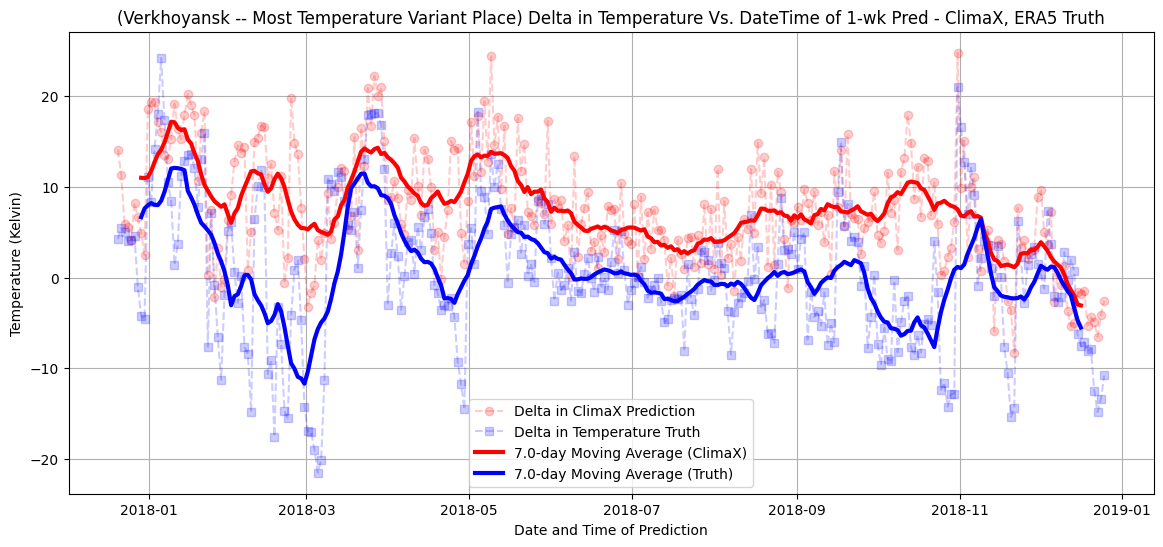

In [11]:
gen_plot("Verkhoyansk -- Most Temperature Variant Place", 66.55, 133.38, day_avg=7)

Got row, col: 111, 222


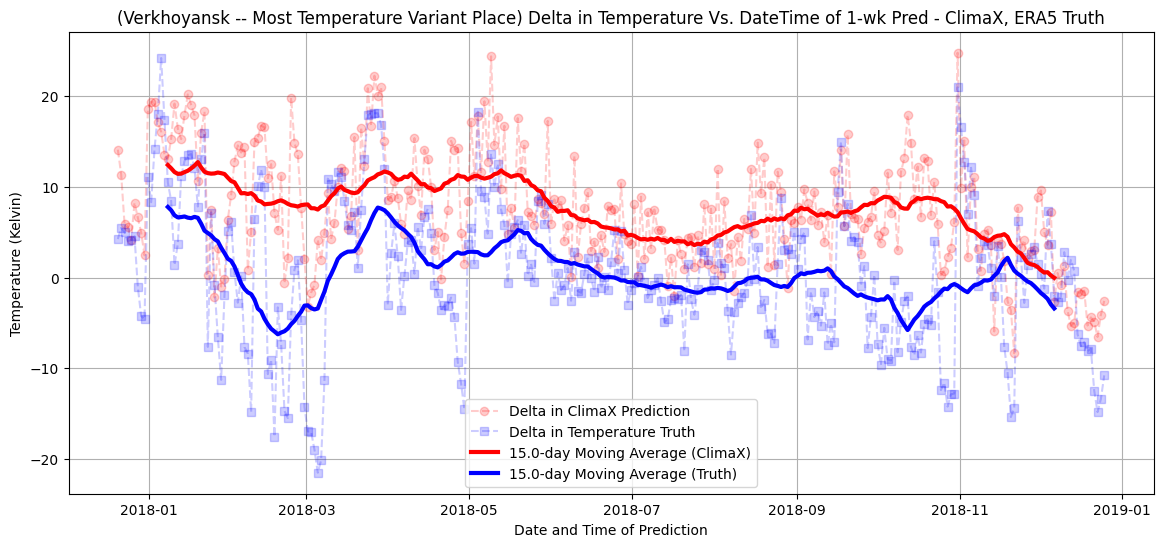

In [12]:
gen_plot("Verkhoyansk -- Most Temperature Variant Place", 66.55, 133.38, day_avg=15)

Got row, col: 80, 146


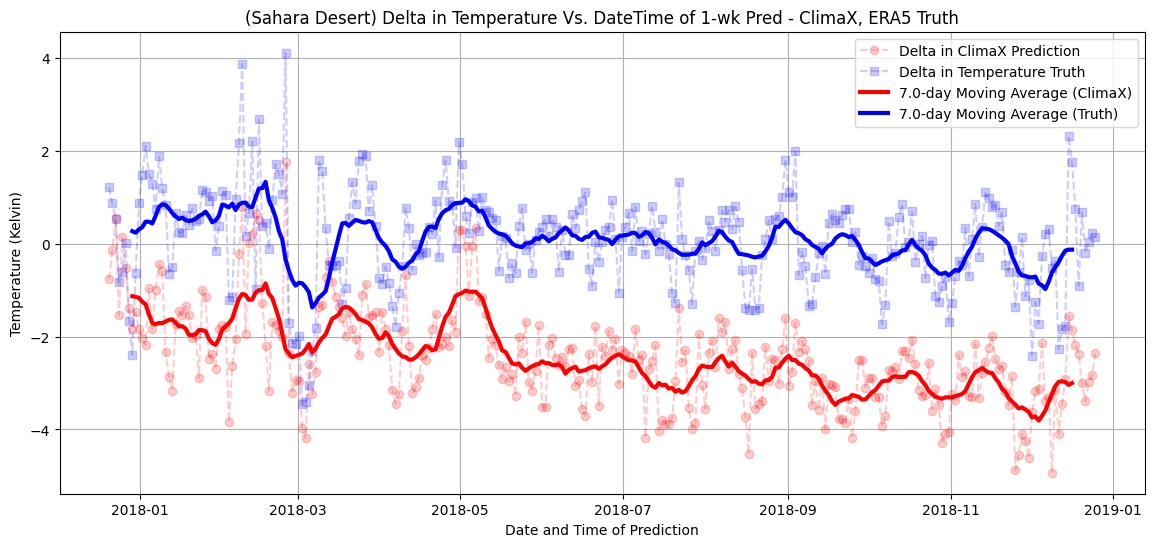

In [13]:
gen_plot("Sahara Desert", 23.41, 25.66, day_avg=7)

Got row, col: 80, 146


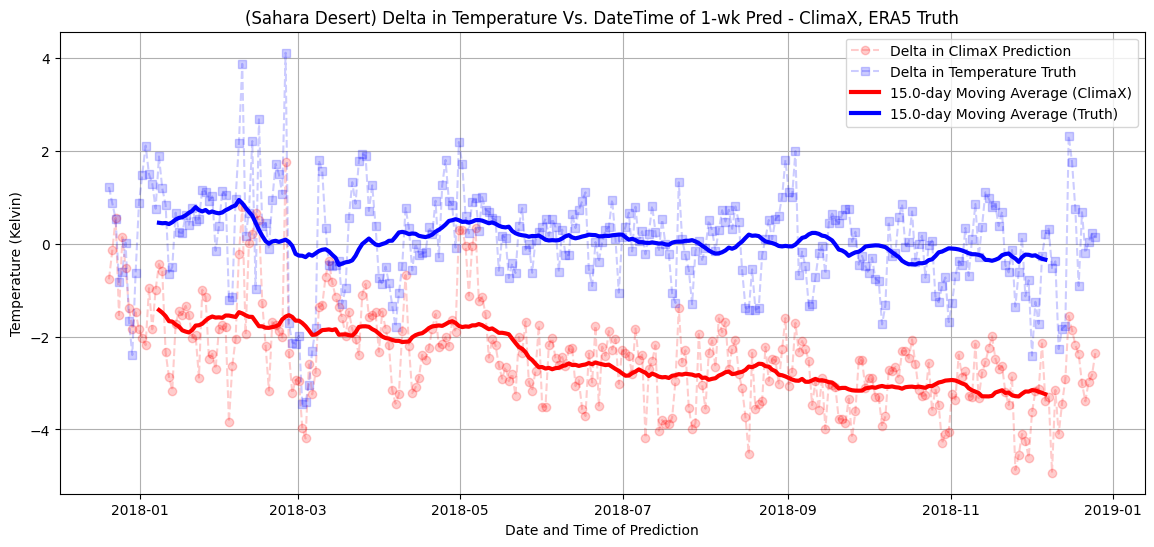

In [14]:
gen_plot("Sahara Desert", 23.41, 25.66, day_avg=15)

Got row, col: 88, 43


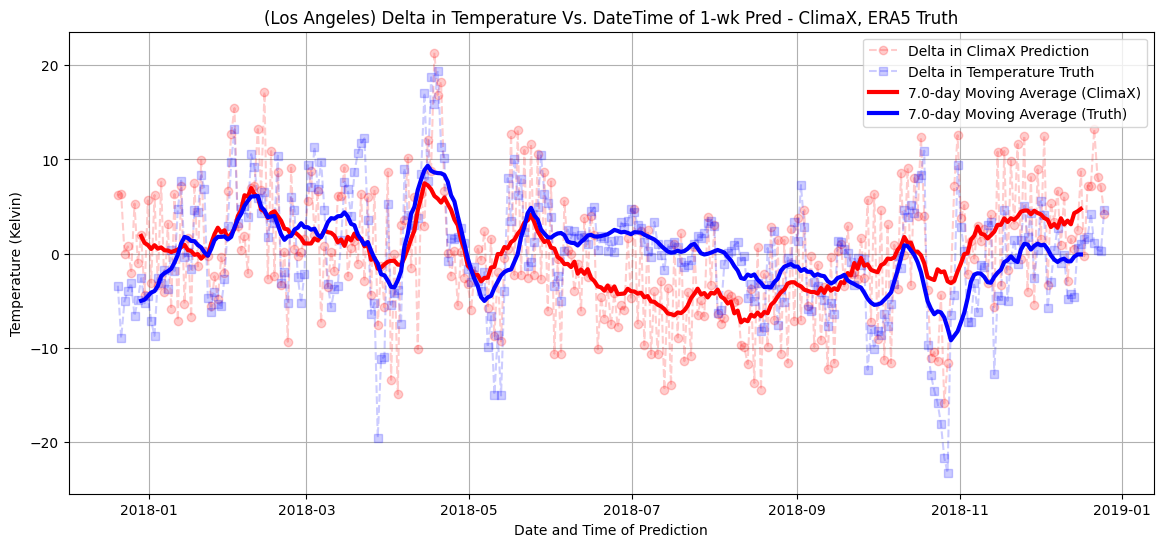

In [15]:
gen_plot("Los Angeles", 34.059, -118.2426, day_avg=7)

Got row, col: 88, 43


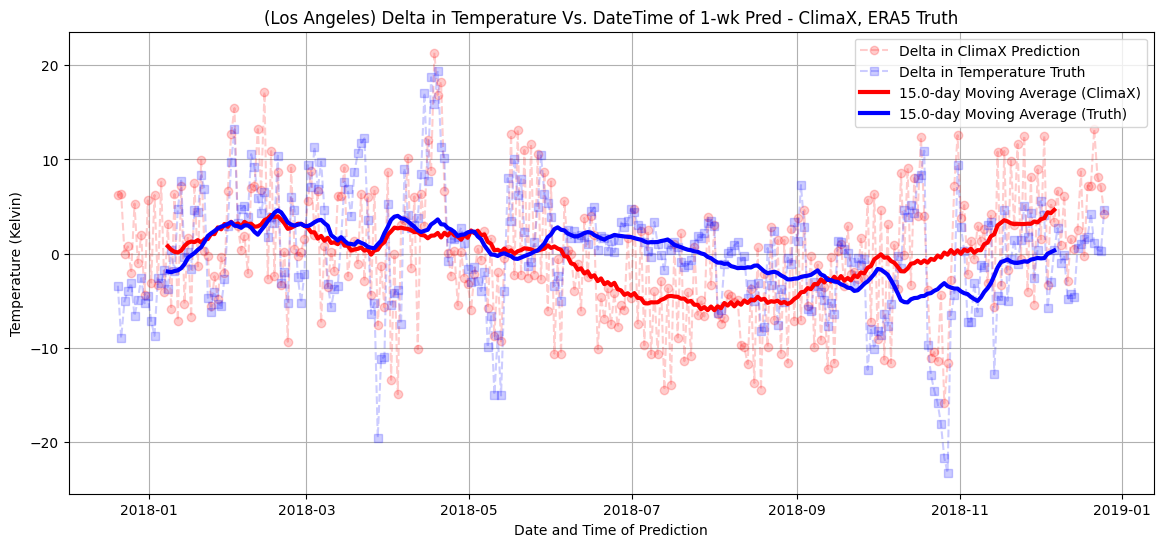

In [16]:
gen_plot("Los Angeles", 34.059, -118.2426, day_avg=15)

Got row, col: 46, 223


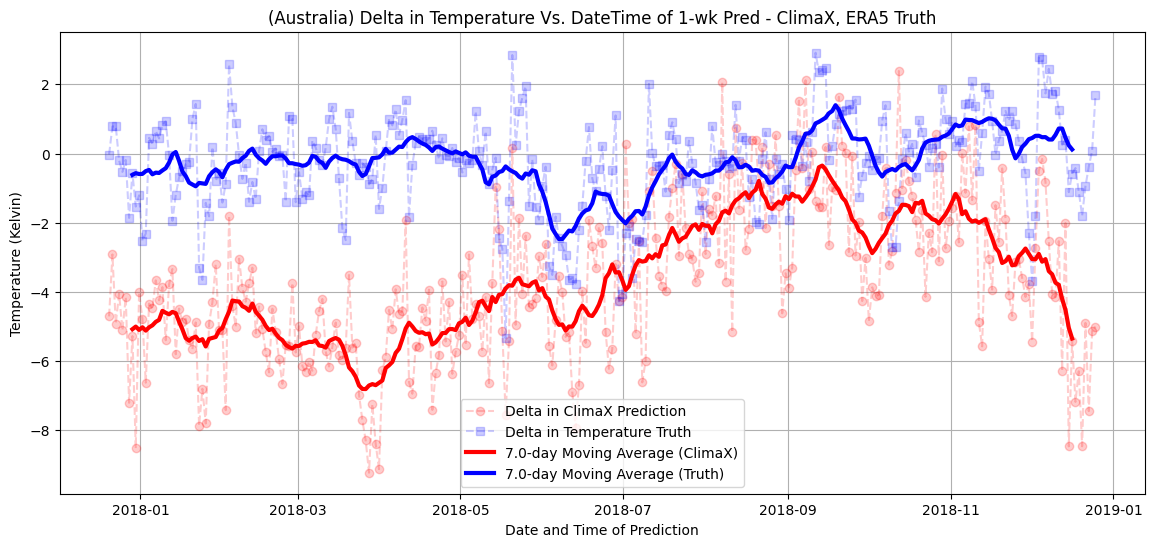

In [17]:
gen_plot("Australia", -25.2744, 133.7751, day_avg=7)

Got row, col: 46, 223


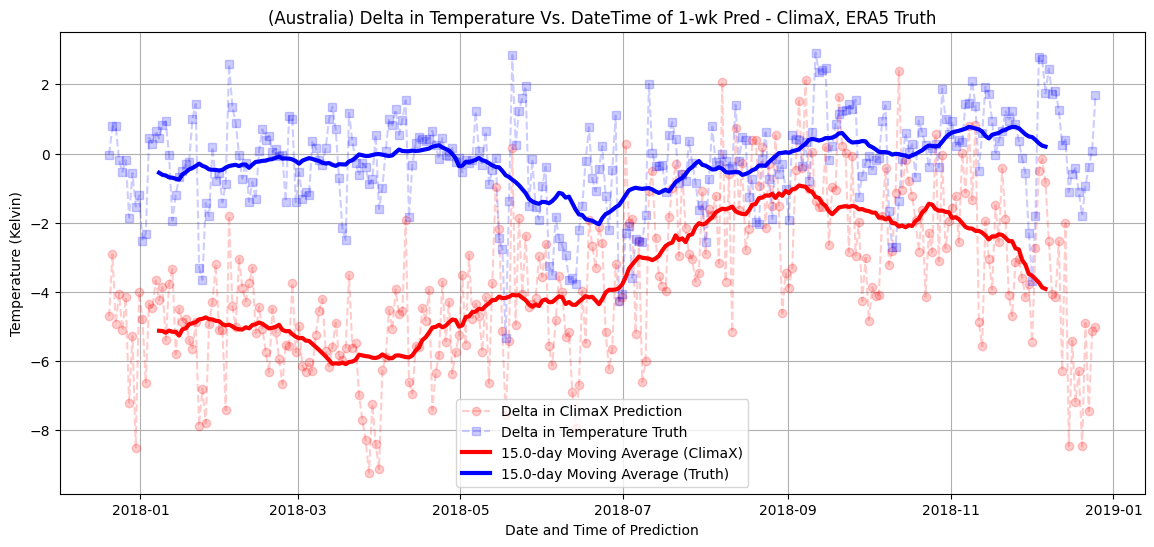

In [18]:
gen_plot("Australia", -25.2744, 133.7751, day_avg=15)

Got row, col: 83, 70


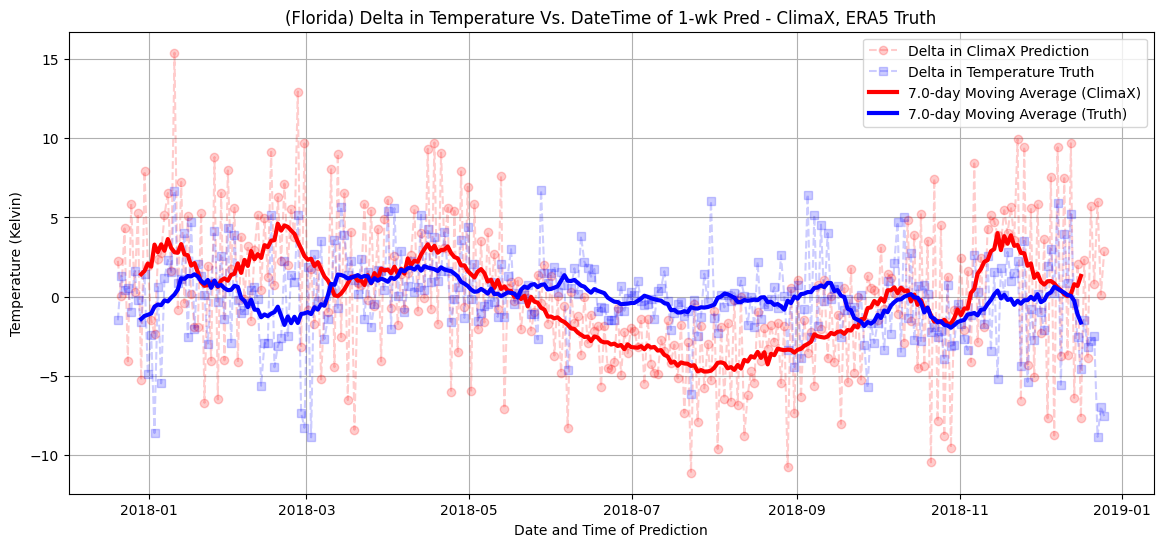

In [19]:
gen_plot("Florida", 27.6648, -81.5158, day_avg=7)

Got row, col: 83, 70


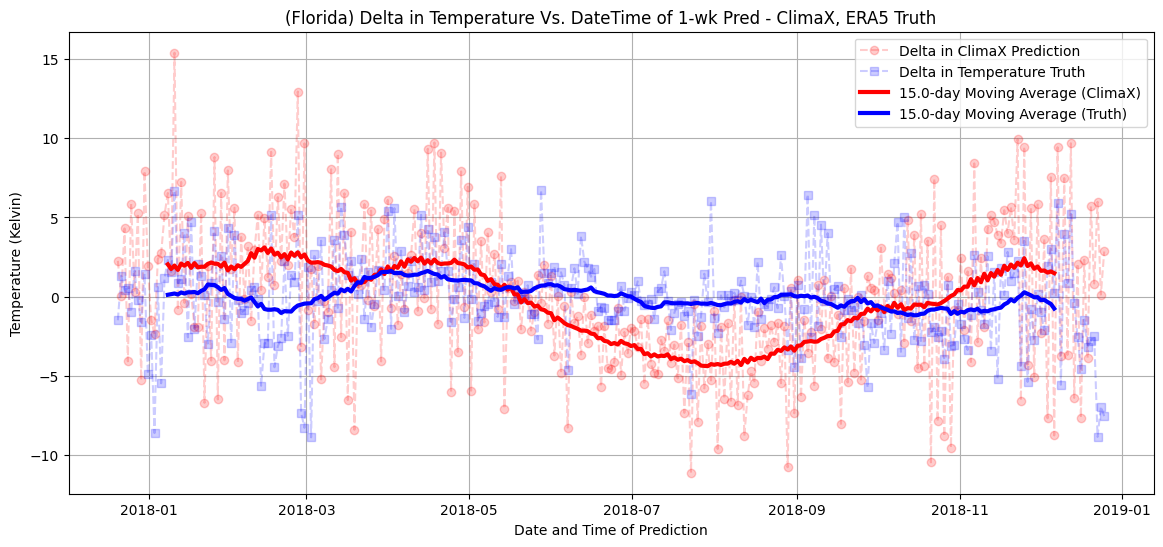

In [20]:
gen_plot("Florida", 27.6648, -81.5158, day_avg=15)